In [1]:
# To get centered plots in Jupyter
from IPython.core.display import HTML
HTML("""
<style>
    .output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

# Importing the libraries
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

In [2]:
"""
feature_train contains the features value for each (city, year, weekofyear)
the actual total_cases are contained in features_test.
"""
labels = [ "ndvi_ne", "ndvi_nw","ndvi_se","ndvi_sw","precipitation_amt_mm","reanalysis_air_temp_k","reanalysis_avg_temp_k",\
    "reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k","reanalysis_min_air_temp_k","reanalysis_precip_amt_kg_per_m2",\
    "reanalysis_relative_humidity_percent","reanalysis_sat_precip_amt_mm","reanalysis_specific_humidity_g_per_kg",\
    "reanalysis_tdtr_k","station_avg_temp_c","station_diur_temp_rng_c","station_max_temp_c",\
    "station_min_temp_c","station_precip_mm"]


data = pd.read_csv('dengue_features_train.csv')
data.head()

# predictor variables are labels starting from week_start_date
# target variable is total_cases
# character variables are city, year, week of year
# continuous variable is everything after week_start_date

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [3]:
# To get an idea of the missing values
data.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [4]:
# First perform univariate analysis on continuous variables:


In [5]:
labels = [ "ndvi_ne", "ndvi_nw","ndvi_se","ndvi_sw","precipitation_amt_mm","reanalysis_air_temp_k","reanalysis_avg_temp_k",\
    "reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k","reanalysis_min_air_temp_k","reanalysis_precip_amt_kg_per_m2",\
    "reanalysis_relative_humidity_percent","reanalysis_sat_precip_amt_mm","reanalysis_specific_humidity_g_per_kg",\
    "reanalysis_tdtr_k","station_avg_temp_c","station_diur_temp_rng_c","station_max_temp_c",\
    "station_min_temp_c","station_precip_mm"]

my_labels = labels[len(labels)//2 : ]

# Data Exploration

# Segementation:
"""
NOAA's GHCN daily climate data weather station measurements
station_max_temp_c – Maximum temperature
station_min_temp_c – Minimum temperature
station_avg_temp_c – Average temperature
station_precip_mm – Total precipitation
station_diur_temp_rng_c – Diurnal temperature range


PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)
precipitation_amt_mm – Total precipitation


NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)
reanalysis_sat_precip_amt_mm – Total precipitation
reanalysis_dew_point_temp_k – Mean dew point temperature
reanalysis_air_temp_k – Mean air temperature
reanalysis_relative_humidity_percent – Mean relative humidity
reanalysis_specific_humidity_g_per_kg – Mean specific humidity
reanalysis_precip_amt_kg_per_m2 – Total precipitation
reanalysis_max_air_temp_k – Maximum air temperature
reanalysis_min_air_temp_k – Minimum air temperature
reanalysis_avg_temp_k – Average air temperature
reanalysis_tdtr_k – Diurnal temperature range


Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements
ndvi_se – Pixel southeast of city centroid
ndvi_sw – Pixel southwest of city centroid
ndvi_ne – Pixel northeast of city centroid
ndvi_nw – Pixel northwest of city centroid
"""
print(my_labels)
data['total_cases'].describe()

['reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']


count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64

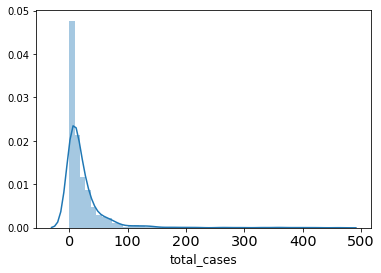

In [6]:
# Studying total_cases
sns.distplot(data['total_cases'])

In [7]:
#skewness and kurtosis
print("Skewness: %f" % data['total_cases'].skew())
print("Kurtosis: %f" % data['total_cases'].kurt())
# There is positive skewness

Skewness: 5.273850
Kurtosis: 36.512530


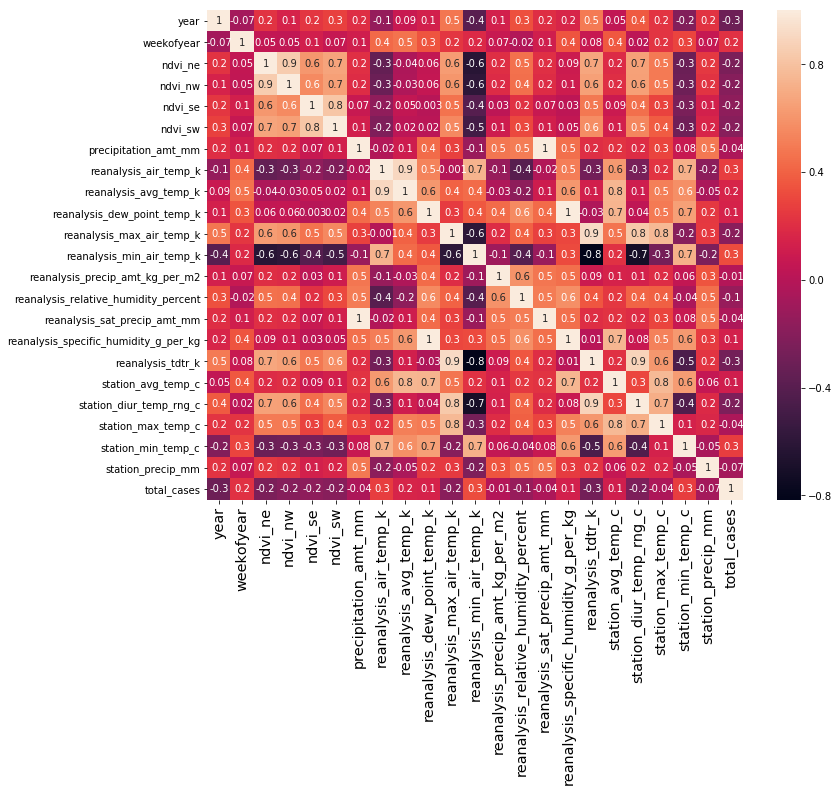

In [8]:
# Correlation heat map
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,annot=True,fmt='.1g');

In [9]:
# Similar variables, just in different units:
station = ["station_avg_temp_c","station_diur_temp_rng_c","station_max_temp_c",\
    "station_min_temp_c","station_precip_mm"]
reanalysis = ["reanalysis_avg_temp_k","reanalysis_tdtr_k","reanalysis_max_air_temp_k",\
              "reanalysis_min_air_temp_k", "reanalysis_precip_amt_kg_per_m2"]

# Let's look if there is correlation between these quantities. 
for i in range(len(station)):
    print(corrmat[station[i]][reanalysis[i]])


0.7513303189014863
0.8811757452591896
0.7634455760617271
0.7207009670901665
0.34893561976946763


### Some observations:

1) The NDVI gives us as idea about the amount of vegetation in the region. We can see that the ndvi_x are positively correlated with one another and have the same negative correlation with total_cases. Therefore we will retain only of these variables. In particular we choose ndvi_se since it has one of the smallest amount of missing values. 

2) We retain the retain reanalysis variables except in the last case where we are measuring total precipitation since they have less missing values. 

3) There is a strong positive correlation between reanalysis_avg_temp_k and reanalysis_air_temp_k so we retain the average
temperature. 

In [10]:
data = data.drop(['ndvi_nw', 'ndvi_ne','ndvi_sw',"station_avg_temp_c","station_diur_temp_rng_c","station_max_temp_c",\
    "station_min_temp_c",'reanalysis_air_temp_k'], axis = 1)

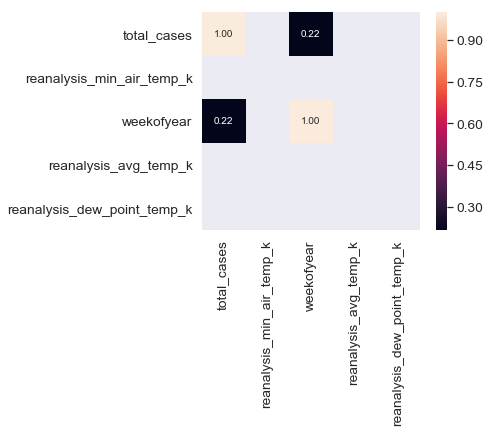

In [11]:
# Re-evaluate the correlation matrix:
corrmat = data.corr()
k = 5
cols = corrmat.nlargest(k, 'total_cases')['total_cases'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

The above heat map shows us that there is weak correlation between total_cases and the following variables

1) reanalysis_avg_temp_k

2) reanalysis_min_air_temp_k

3) reanalysis_dew_point_temp_k

There is however, positive correlation amongst the features. 

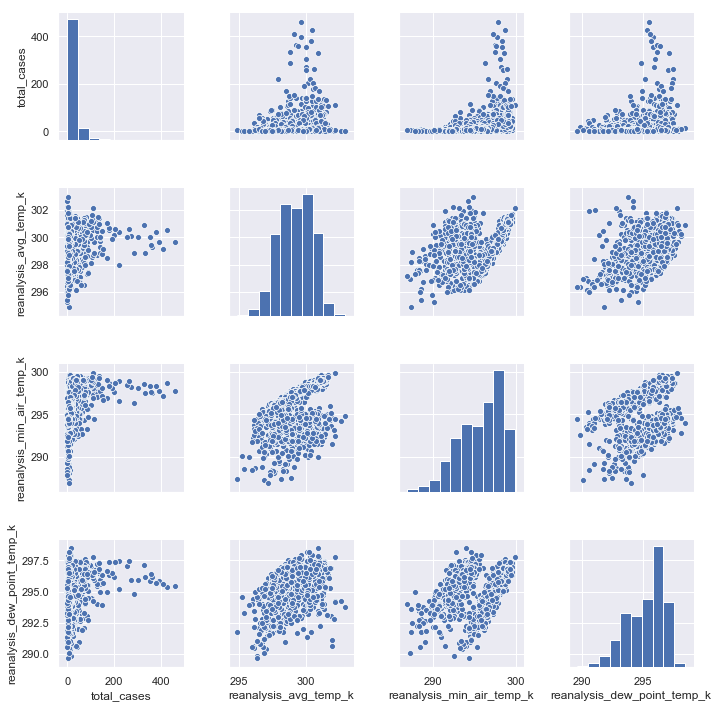

In [12]:
#scatterplot
sns.set()
cols = ['total_cases','reanalysis_avg_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_dew_point_temp_k']
sns.pairplot(data[cols], size = 2.5)
plt.show();

In [13]:
# Figure out the missing data situation. 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                                       Total   Percent
station_precip_mm                         22  0.015110
ndvi_se                                   22  0.015110
reanalysis_sat_precip_amt_mm              13  0.008929
precipitation_amt_mm                      13  0.008929
reanalysis_max_air_temp_k                 10  0.006868
reanalysis_tdtr_k                         10  0.006868
reanalysis_specific_humidity_g_per_kg     10  0.006868
reanalysis_relative_humidity_percent      10  0.006868
reanalysis_precip_amt_kg_per_m2           10  0.006868
reanalysis_min_air_temp_k                 10  0.006868
reanalysis_dew_point_temp_k               10  0.006868
reanalysis_avg_temp_k                     10  0.006868
weekofyear                                 0  0.000000
year                                       0  0.000000
total_cases                                0  0.000000
week_start_date                            0  0.000000
city                                       0  0.000000


In [15]:
# Let's get rid of the missing data, but first make the empty string cells NaN
cols = ['ndvi_se',\
       'precipitation_amt_mm', 'reanalysis_avg_temp_k',\
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',\
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',\
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',\
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',\
       'station_precip_mm']

for col in cols:
    data = data.replace('',np.nan)

data = data.dropna()
data.describe()

,year,weekofyear,ndvi_se,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_precip_mm,total_cases
count,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000
mean,2001.074965,26.362801,0.203399,45.873281,299.224207,295.251595,303.421287,295.723055,40.286174,82.182183,45.873281,16.751596,4.893857,39.451061,21.804102
std,5.371944,14.828553,0.073441,43.756897,1.262352,1.529403,3.223798,2.571363,43.610973,7.127503,43.756897,1.543918,3.528391,47.663256,30.762390
min,1990.000000,1.000000,-0.015533,0.000000,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,0.000000,0.000000
25%,1997.000000,14.000000,0.154761,9.862500,298.257143,294.118929,301.000000,293.900000,13.200000,77.192143,9.862500,15.557143,2.328571,8.700000,5.000000
50%,2002.000000,26.000000,0.196143,38.515000,299.292857,295.645714,302.400000,296.200000,27.295000,80.345000,38.515000,17.118571,2.857143,23.800000,12.000000
75%,2005.000000,39.000000,0.248846,70.280000,300.207143,296.477500,305.500000,298.000000,52.575000,86.407857,70.280000,17.987500,7.625000,54.100000,27.000000
max,2010.000000,52.000000,0.538314,390.600000,302.614286,298.450000,313.200000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,543.300000,329.000000
